## 자전거 대여량 예측

워싱턴 D.C 소재의 자전거 대여 스타트업 Capital Bikeshare의 데이터를 활용하여, 특정 시간대에 얼마나 많은 사람들이 자전거를 대여하는지 예측하는 것이 목표입니다.

사람들이 자전거를 대여하는데는 많은 요소가 관여되어 있을 겁니다. 가령 **시간(새벽보다 낮에 많이 빌리겠죠)**, **날씨(비가 오면 자전거를 대여하지 않을 겁니다), 근무일(근무 시간에는 자전거를 대여하지 않겠죠)** 등. 이런 모든 요소를 조합하여 워싱턴 D.C의 자전거 교통량을 예측해주세요.

## 데이터 설명

#### 파일 구조
- train.csv
    - 학습을 위하여 활용되는 데이터 셋입니다.
- test.csv
    - 평가를 위하여 제공되는 데이터 셋입니다.
- submission.csv
    - test.csv 파일을 예측한 결과를 submission 파일에 작성한 후 제출합니다.
    
#### 컬럼 구조
  * **datetime** - 시간. 연-월-일 시:분:초 로 표현합니다. (가령 2011-01-01 00:00:00은 2011년 1월 1일 0시 0분 0초)
  * **season** - 계절. 봄(1), 여름(2), 가을(3), 겨울(4) 순으로 표현합니다.
  * **holiday** - 공휴일. 1이면 공휴일이며, 0이면 공휴일이 아닙니다.
  * **workingday** - 근무일. 1이면 근무일이며, 0이면 근무일이 아닙니다.
  * **weather** - 날씨. 1 ~ 4 사이의 값을 가지며, 구체적으로는 다음과 같습니다.
    * 1: 아주 깨끗한 날씨입니다. 또는 아주 약간의 구름이 끼어있습니다.
    * 2: 약간의 안개와 구름이 끼어있는 날씨입니다.
    * 3: 약간의 눈, 비가 오거나 천둥이 칩니다.
    * 4: 아주 많은 비가 오거나 우박이 내립니다.
  * **temp** - 온도. 섭씨(Celsius)로 적혀있습니다.
  * **atemp** - 체감 온도. 마찬가지로 섭씨(Celsius)로 적혀있습니다.
  * **humidity** - 습도.
  * **windspeed** - 풍속.
  * **casual** - 비회원(non-registered)의 자전거 대여량.
  * **registered** - 회원(registered)의 자전거 대여량.
  * **count** - 총 자전거 대여랑. 비회원(casual) + 회원(registered)과 동일합니다.
  
  ## 프로젝트 구성
* 데이터 로드 (load data, train.csv, test.csv)
* 데이터 전처리 및 특성 공학 (train.csv, test.csv)
* 모델 생성 및 검증 (train.csv)
* 평가 데이터 예측 (test.csv)
* 결과 제출 및 점수 확인

## 제출 이력 및 순위 조회
[평가시스템](http://manage.jaen.kr)에 접속하여 확인 가능
> 로그인 -> 프로젝트 -> 자전거 대여량 예측 -> 리더보드

### 접속 정보
- ID : `test@sk.com`
- PWD : `HELLO`

## 환경 설정

In [1]:
project_name = "자전거 대여량 예측" # 프로젝트 이름
class_info = "15차수 A반" # 차수 정보
email = "oh.myeongseob@sk.com" # 회사 이메일을 넣어주세요. (~~~@sk.com)

## 모듈 설치 및 데이터 다운로드

In [5]:
!pip3 install mySUNI
!pip3 install seaborn

You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
     |████████████████████████████████| 292 kB 2.0 MB/s eta 0:00:01
     |████████████████████████████████| 32.8 MB 7.3 kB/s  eta 0:00:01
     |████████████████████████████████| 7.2 MB 12.7 MB/s eta 0:00:01
     |████████████████████████████████| 61 kB 951 kB/s  eta 0:00:01
     |████████████████████████████████| 3.0 MB 12.0 MB/s eta 0:00:01
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.


In [6]:
from mySUNI import cds

In [7]:
cds.download_project(project_name, class_info, email)


프로젝트: 자전거 대여량 예측
파일 목록

test.csv
- data/자전거 대여량 예측/test.csv

submission.csv
- data/자전거 대여량 예측/submission.csv

train.csv
- data/자전거 대여량 예측/train.csv



## 모듈 import 

필요한 모듈을 import 합니다. 필요에 따라 추가 패키지를 load 할 수 있습니다.

In [8]:
import os
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Data 경로 설정
DATA_DIR = 'data'

# train 데이터셋 로드 (train.csv)
train = pd.read_csv(os.path.join(DATA_DIR, project_name, 'train.csv'))
                                 
# test 데이터셋 로드 (test.csv)
test = pd.read_csv(os.path.join(DATA_DIR, project_name, 'test.csv'))

# submission 파일 로드 (submission.csv)
submission = pd.read_csv(os.path.join(DATA_DIR, project_name, 'submission.csv'))

2개의 데이터 셋트를 나누어 제공합니다.

1. train: 학습용 데이터 세트. 정답 값이라고 할 수 있는 `label` 값이 같이 제공됩니다.
2. test: 예측용 데이터 세트. 정답 값이 빠진 `feature` 들만 제공됩니다. 우리는 이 `feature`를 활용하여 예측을 진행합니다.
3. submission: 정답 제출용 데이터 세트. 주어진 형식에 맞춰 정답 값을 기입하고 제출합니다.

In [9]:
# 학습 데이터 조회
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [10]:
train.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [11]:
train['hour'] = pd.to_datetime(train['datetime'], infer_datetime_format=True)
train['hour'] = train['hour'].dt.hour

train['month'] = pd.to_datetime(train['datetime'], infer_datetime_format=True)
train['month'] = train['month'].dt.month

test['hour'] = pd.to_datetime(test['datetime'], infer_datetime_format=True)
test['hour'] = test['hour'].dt.hour

test['month'] = pd.to_datetime(test['datetime'], infer_datetime_format=True)
test['month'] = test['month'].dt.month

In [12]:
train['hour'].tail()

10881    19
10882    20
10883    21
10884    22
10885    23
Name: hour, dtype: int64

In [136]:
train['month'].head()

0    1
1    1
2    1
3    1
4    1
Name: month, dtype: int64

In [137]:
train.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
hour          0
month         0
dtype: int64

In [138]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,11.541613,6.521495
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,6.915838,3.444373
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,6.000000,4.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,12.000000,7.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,18.000000,10.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,23.000000,12.000000


In [139]:
# 평가 데이터 조회
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,month
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,0,1
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2,1
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,3,1
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,4,1


In [140]:
test.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,month
count,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000
mean,2.493300,0.029108,0.685815,1.436778,20.620607,24.012865,64.125212,12.631157,11.555367,6.565070
std,1.091258,0.168123,0.464226,0.648390,8.059583,8.782741,19.293391,8.250151,6.912526,3.429462
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,16.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,49.000000,7.001500,6.000000,4.000000
50%,3.000000,0.000000,1.000000,1.000000,21.320000,25.000000,65.000000,11.001400,12.000000,7.000000
75%,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,81.000000,16.997900,18.000000,10.000000
max,4.000000,1.000000,1.000000,4.000000,40.180000,50.000000,100.000000,55.998600,23.000000,12.000000


In [13]:
features = [
    'month',
    'hour',
    'season',
    'holiday',
    'workingday',
    'weather',
    'temp',
#     'atemp',
    'humidity',
    'windspeed',
]

In [14]:
train[features]

,month,hour,season,holiday,workingday,weather,temp,humidity,windspeed
0,1,0,1,0,0,1,9.84,81,0.0000
1,1,1,1,0,0,1,9.02,80,0.0000
2,1,2,1,0,0,1,9.02,80,0.0000
3,1,3,1,0,0,1,9.84,75,0.0000
4,1,4,1,0,0,1,9.84,75,0.0000
...,...,...,...,...,...,...,...,...,...
10881,12,19,4,0,1,1,15.58,50,26.0027
10882,12,20,4,0,1,1,14.76,57,15.0013
10883,12,21,4,0,1,1,13.94,61,15.0013
10884,12,22,4,0,1,1,13.94,61,6.0032


In [15]:
X = train[features]
Y = train['count']

In [144]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   month       10886 non-null  int64  
 1   hour        10886 non-null  int64  
 2   season      10886 non-null  int64  
 3   holiday     10886 non-null  int64  
 4   workingday  10886 non-null  int64  
 5   weather     10886 non-null  int64  
 6   temp        10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
dtypes: float64(2), int64(7)
memory usage: 765.5 KB


In [145]:
X.describe()

,month,hour,season,holiday,workingday,weather,temp,humidity,windspeed
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000
mean,6.521495,11.541613,2.506614,0.028569,0.680875,1.418427,20.23086,61.886460,12.799395
std,3.444373,6.915838,1.116174,0.166599,0.466159,0.633839,7.79159,19.245033,8.164537
min,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.82000,0.000000,0.000000
25%,4.000000,6.000000,2.000000,0.000000,0.000000,1.000000,13.94000,47.000000,7.001500
50%,7.000000,12.000000,3.000000,0.000000,1.000000,1.000000,20.50000,62.000000,12.998000
75%,10.000000,18.000000,4.000000,0.000000,1.000000,2.000000,26.24000,77.000000,16.997900
max,12.000000,23.000000,4.000000,1.000000,1.000000,4.000000,41.00000,100.000000,56.996900


In [146]:
X['humidity'].mode()

0    88
dtype: int64

In [147]:
X['humidity'].value_counts()

88    368
94    324
83    316
87    289
70    259
     ... 
13      1
10      1
12      1
96      1
91      1
Name: humidity, Length: 89, dtype: int64

In [148]:
X['windspeed'].mode()

0    0.0
dtype: float64

In [149]:
X['windspeed'].value_counts()

0.0000     1313
8.9981     1120
11.0014    1057
12.9980    1042
7.0015     1034
15.0013     961
6.0032      872
16.9979     824
19.0012     676
19.9995     492
22.0028     372
23.9994     274
26.0027     235
27.9993     187
30.0026     111
31.0009      89
32.9975      80
35.0008      58
39.0007      27
36.9974      22
43.0006      12
40.9973      11
43.9989       8
46.0022       3
56.9969       2
47.9988       2
50.0021       1
51.9987       1
Name: windspeed, dtype: int64

/usr/local/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/usr/local/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


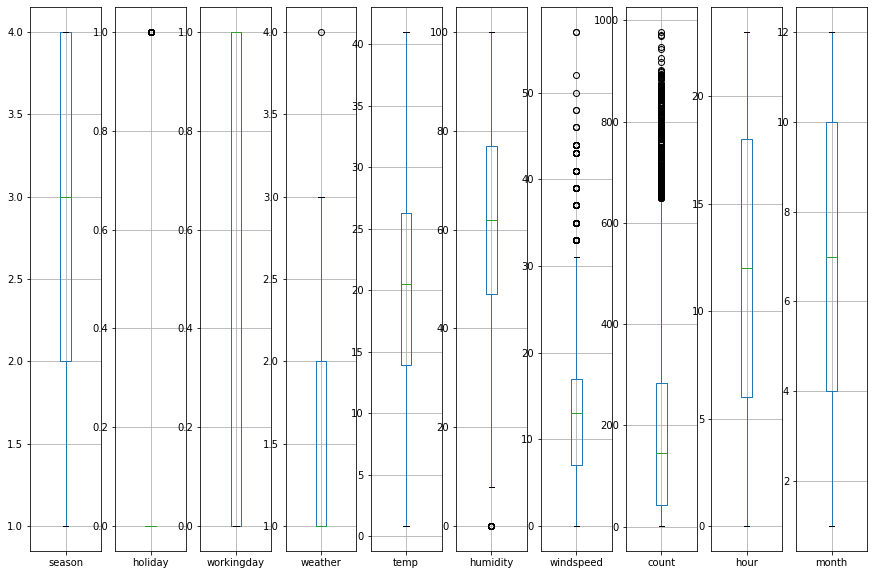

In [16]:
data = train.copy()
data.drop(['datetime', 'casual', 'registered', 'atemp'],
  axis='columns', inplace=True)
# 컬럼별로 box-plot
data.iloc[:, :data.shape[1]].plot(kind='box', figsize=(15, 10), 
                                    subplots=True, grid=True)  #               constrained_layout=True) 
# 그리고자 하는 data의 컬럼 수와 layout의 수가 동일해야 함. 10*3 ->30, 
# 그리고자 하는 data의 컬럼의 수가 30 
plt.show()

In [151]:
data

,season,holiday,workingday,weather,temp,humidity,windspeed,count,hour,month
0,1,0,0,1,9.84,81,0.0000,16,0,1
1,1,0,0,1,9.02,80,0.0000,40,1,1
2,1,0,0,1,9.02,80,0.0000,32,2,1
3,1,0,0,1,9.84,75,0.0000,13,3,1
4,1,0,0,1,9.84,75,0.0000,1,4,1
...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,50,26.0027,336,19,12
10882,4,0,1,1,14.76,57,15.0013,241,20,12
10883,4,0,1,1,13.94,61,15.0013,168,21,12
10884,4,0,1,1,13.94,61,6.0032,129,22,12


<Figure size 2160x2160 with 0 Axes>

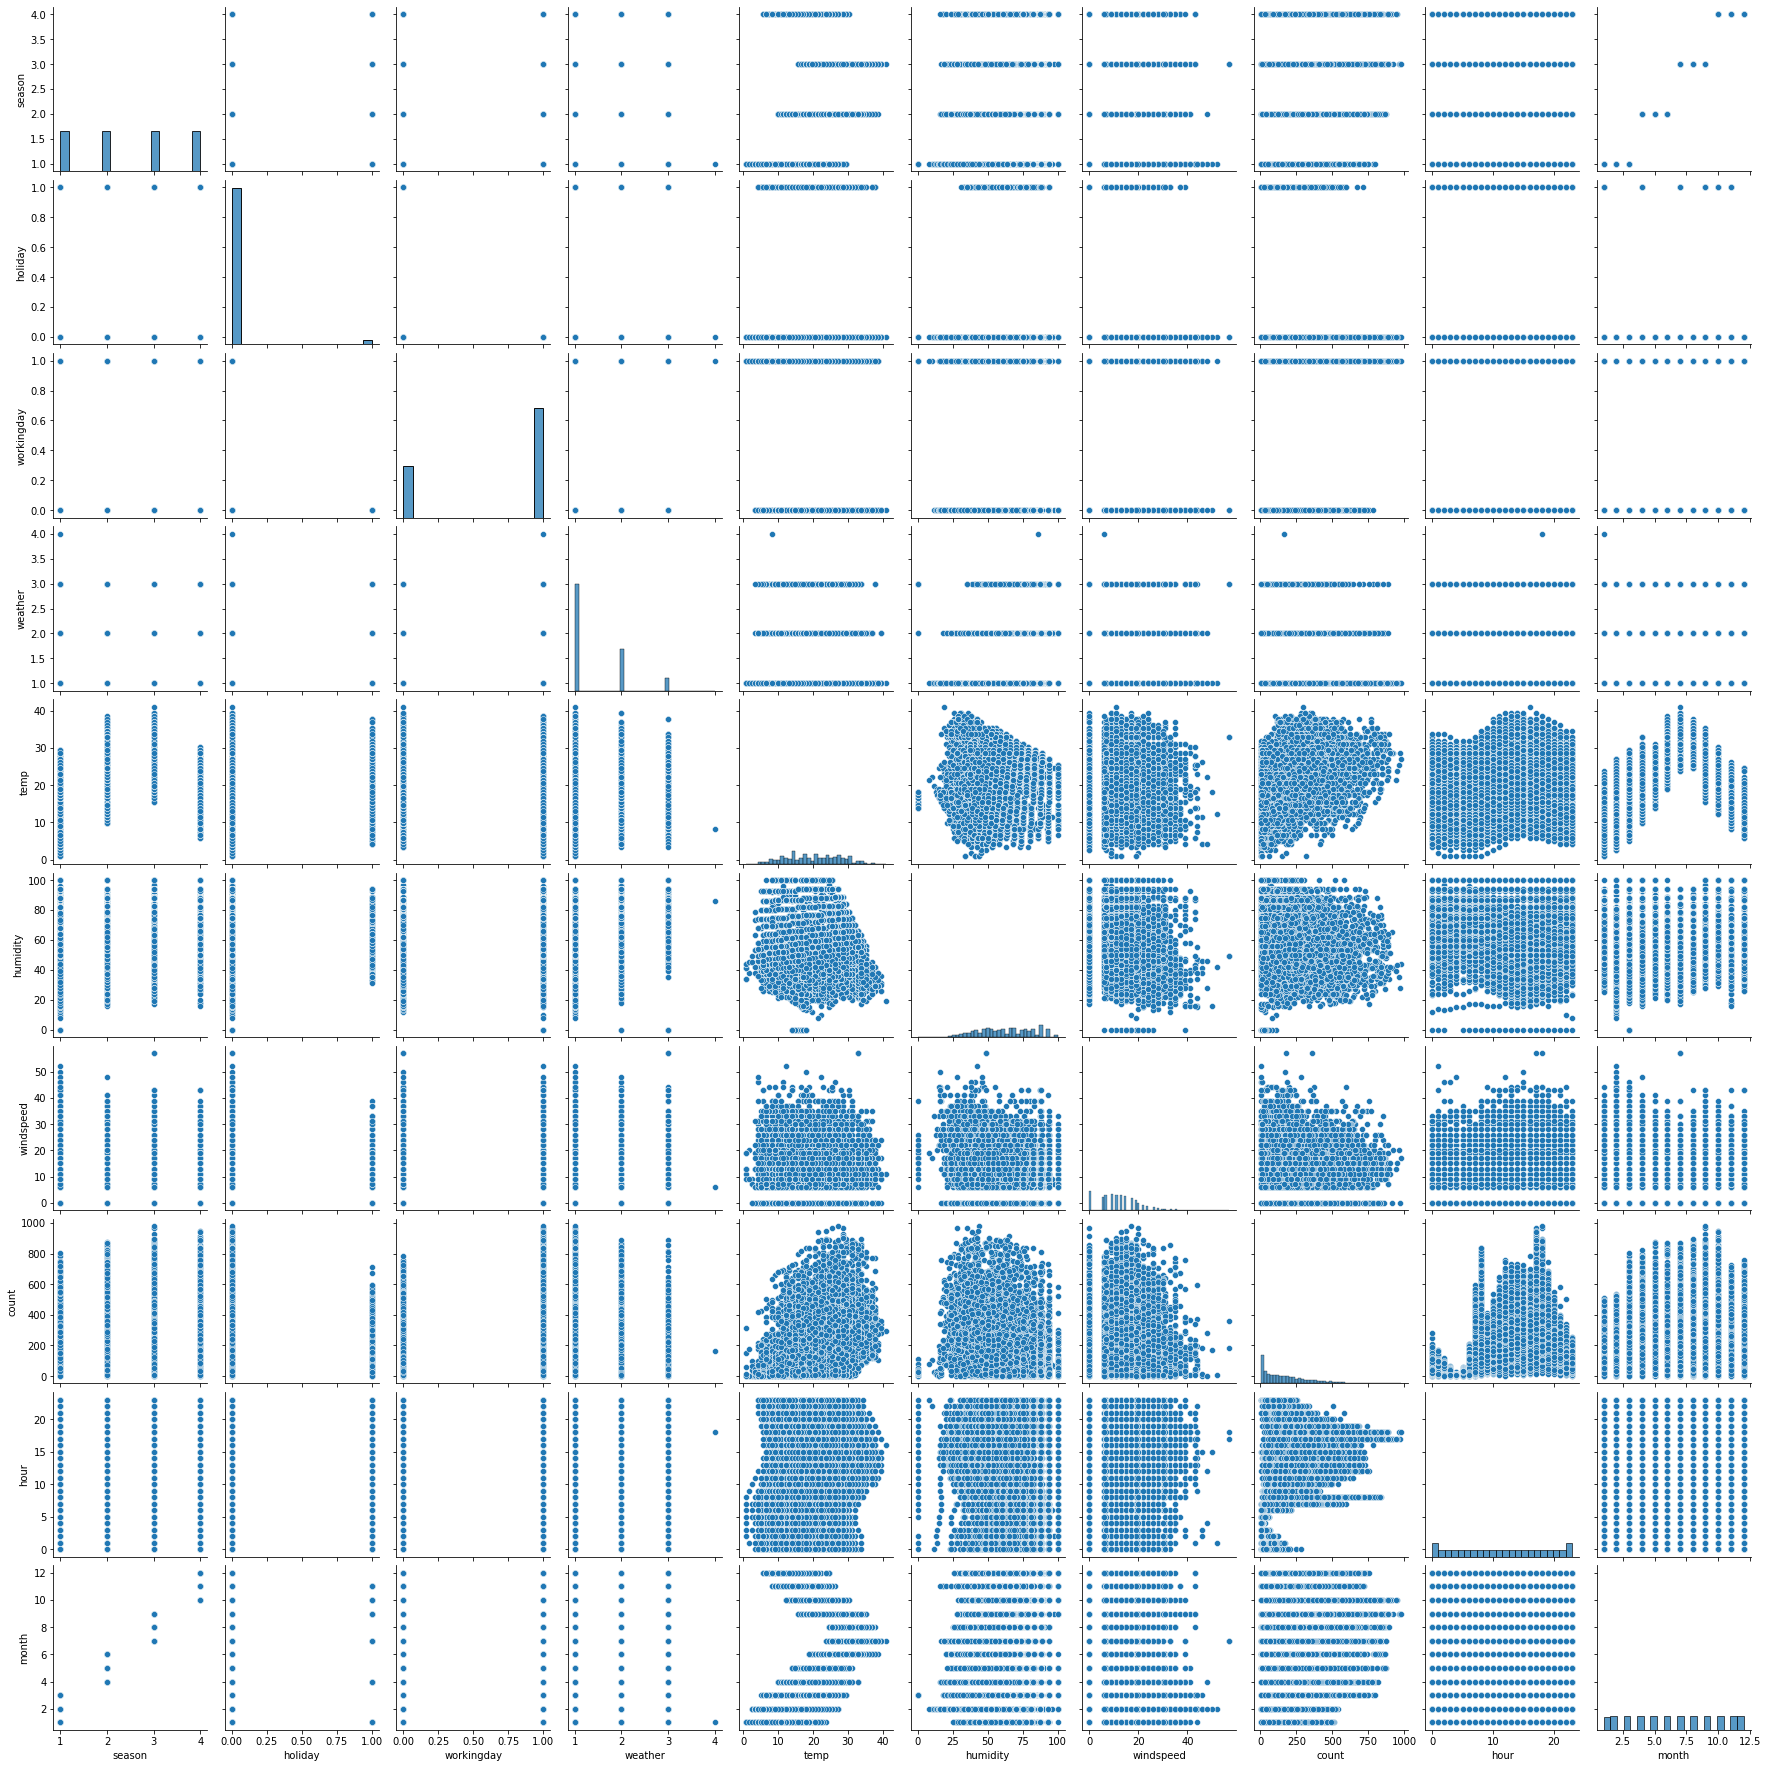

In [103]:
plt.figure(figsize=(30, 30))
sns.pairplot(data)#, corner=True
plt.show()

In [18]:
from sklearn.preprocessing import MinMaxScaler
minmax_features = [
    'temp',
    'humidity',
    'windspeed',
]
x_temp = data[minmax_features]
y_temp = data['count']
scaler = MinMaxScaler()
data_scmm = scaler.fit_transform(x_temp)
# data_scmm['count'] = data['count']

df_scmm = pd.DataFrame(data_scmm, columns=minmax_features)
df_scmm['count'] = data['count']
data_scmm = data.copy()
for _feature in minmax_features:
    data_scmm[_feature] = df_scmm[_feature]
    
test_scmm = test.copy()
x_temp = test_scmm[minmax_features]
x_temp = scaler.transform(x_temp)
x_temp = pd.DataFrame(x_temp, columns=minmax_features)
for _feature in minmax_features:
    test_scmm[_feature] = x_temp[_feature]

test_scmm

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,month
0,2011-01-20 00:00:00,1,0,1,1,0.244898,11.365,0.56,0.456213,0,1
1,2011-01-20 01:00:00,1,0,1,1,0.244898,13.635,0.56,0.000000,1,1
2,2011-01-20 02:00:00,1,0,1,1,0.244898,13.635,0.56,0.000000,2,1
3,2011-01-20 03:00:00,1,0,1,1,0.244898,12.880,0.56,0.193018,3,1
4,2011-01-20 04:00:00,1,0,1,1,0.244898,12.880,0.56,0.193018,4,1
...,...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,0.244898,12.880,0.60,0.193018,19,12
6489,2012-12-31 20:00:00,1,0,1,2,0.244898,12.880,0.60,0.193018,20,12
6490,2012-12-31 21:00:00,1,0,1,1,0.244898,12.880,0.60,0.193018,21,12
6491,2012-12-31 22:00:00,1,0,1,1,0.244898,13.635,0.56,0.157870,22,12


<Figure size 1080x1080 with 0 Axes>

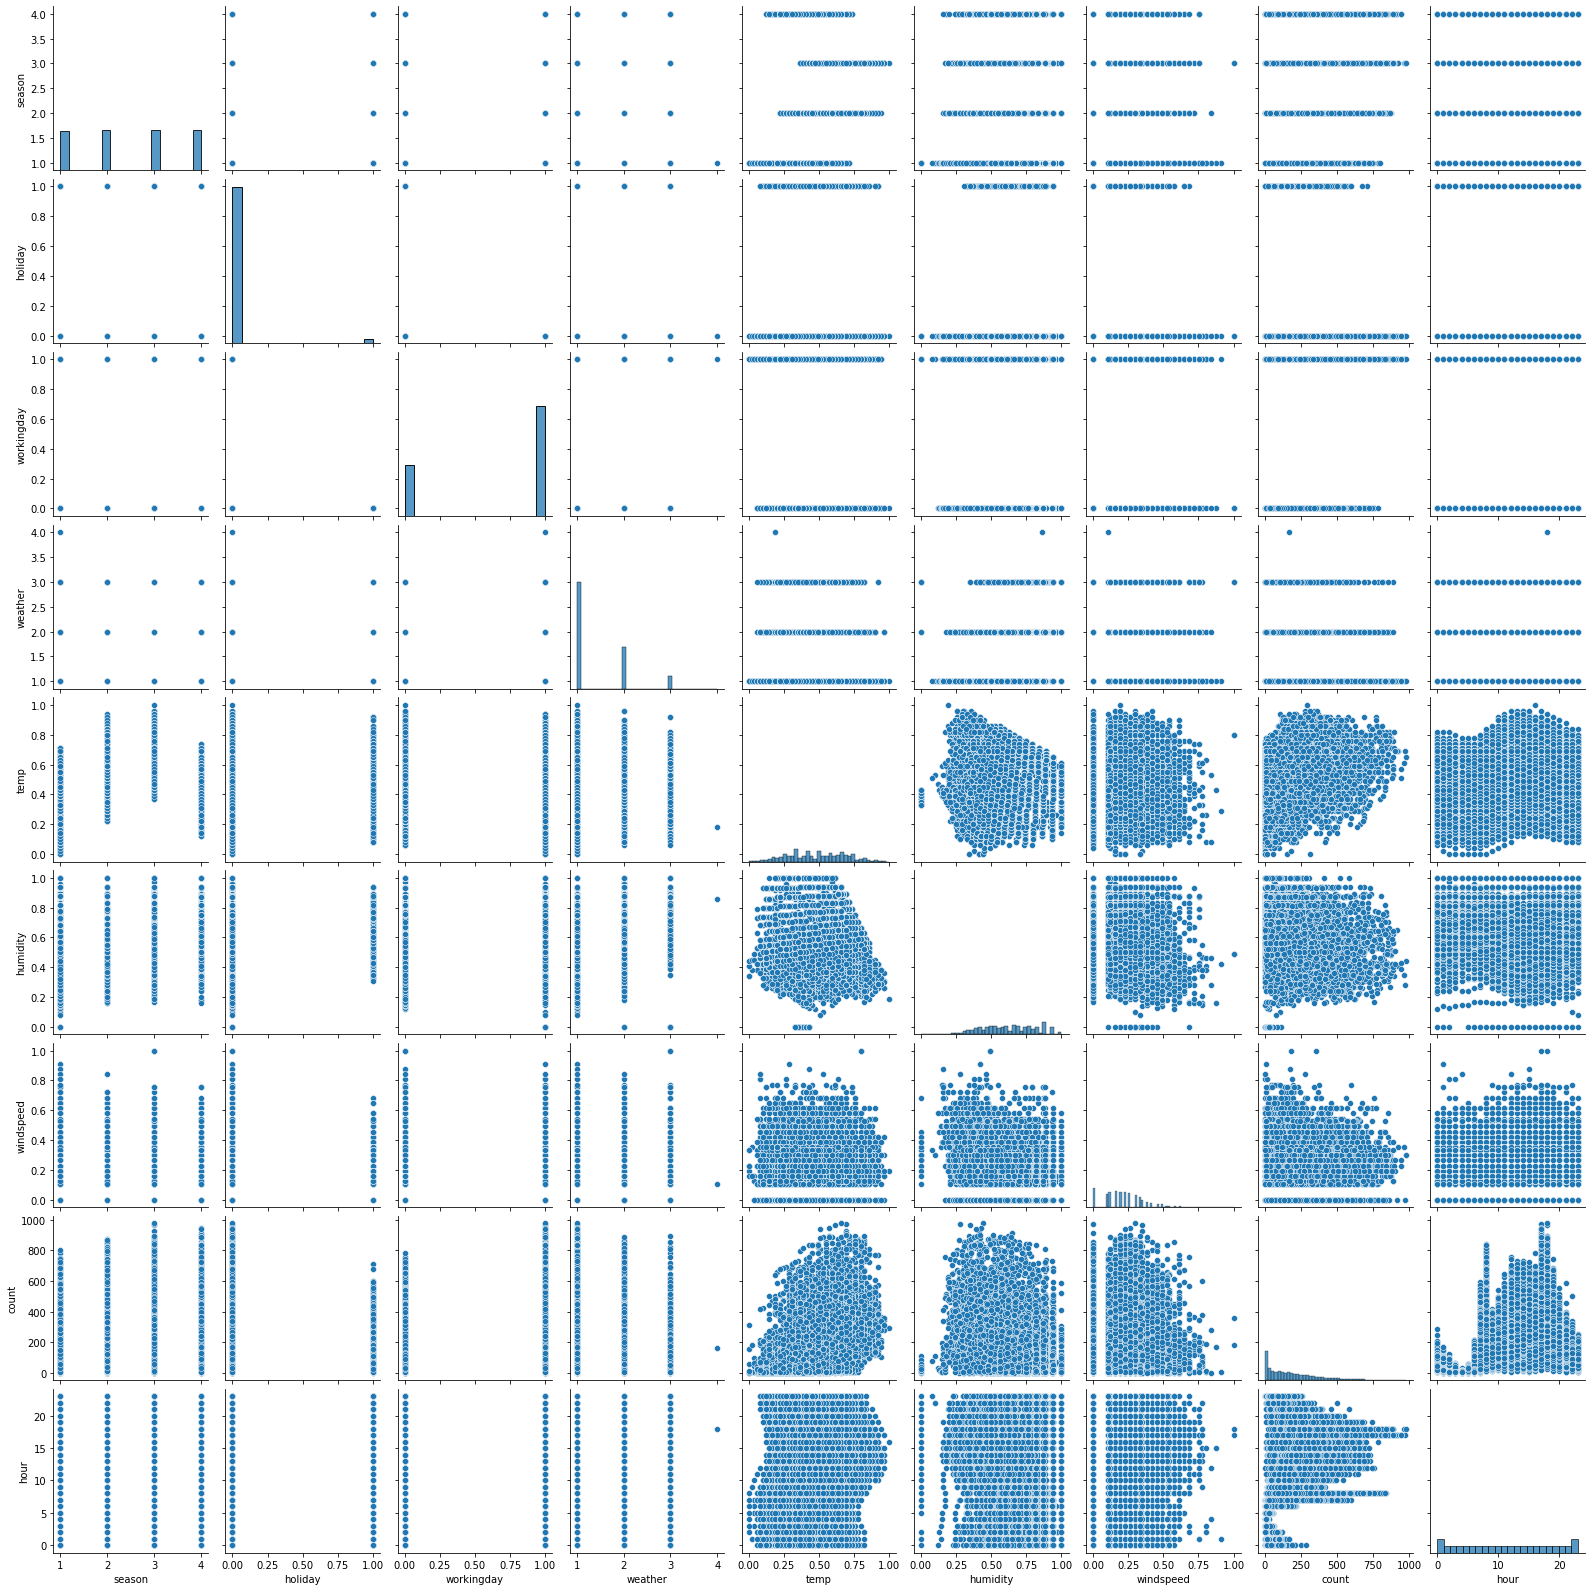

In [25]:
plt.figure(figsize=(15, 15))
sns.pairplot(data_scmm)#, corner=True
plt.show()

In [26]:
data.describe()

,season,holiday,workingday,weather,temp,humidity,windspeed,count,hour
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,61.886460,12.799395,191.574132,11.541613
std,1.116174,0.166599,0.466159,0.633839,7.79159,19.245033,8.164537,181.144454,6.915838
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.000000,0.000000,1.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,47.000000,7.001500,42.000000,6.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,62.000000,12.998000,145.000000,12.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,77.000000,16.997900,284.000000,18.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,100.000000,56.996900,977.000000,23.000000


In [27]:
data_scmm.describe()

,season,holiday,workingday,weather,temp,humidity,windspeed,count,hour
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,0.483098,0.618865,0.224563,191.574132,11.541613
std,1.116174,0.166599,0.466159,0.633839,0.193917,0.192450,0.143245,181.144454,6.915838
min,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.326531,0.470000,0.122840,42.000000,6.000000
50%,3.000000,0.000000,1.000000,1.000000,0.489796,0.620000,0.228047,145.000000,12.000000
75%,4.000000,0.000000,1.000000,2.000000,0.632653,0.770000,0.298225,284.000000,18.000000
max,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,977.000000,23.000000


In [21]:
X = data[features]
Y = data['count']

# X = data_scmm[features]
# Y = data_scmm['count']
# test = test_scmm

x_train = X
y_train = Y


In [22]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=0).fit(X, Y)

In [23]:
model.score(x_train, y_train)

0.980495943619611

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
model = RandomForestRegressor()

params = {
    'max_depth' : range(1, 11, 1),
}
gs = GridSearchCV(model, params, cv=5).fit(x_train, y_train)


In [156]:
pd.DataFrame(gs.cv_results_).sort_values('rank_test_score').head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
9,1.268195,0.004883,0.026460,0.000928,10,{'max_depth': 10},-0.340515,0.461183,0.364913,0.641821,0.658637,0.357208,0.365938,1
8,1.155644,0.023963,0.024613,0.001779,9,{'max_depth': 9},-0.386641,0.488688,0.350251,0.668781,0.655293,0.355274,0.388988,2
7,1.013937,0.003959,0.020800,0.000911,8,{'max_depth': 8},-0.408403,0.548302,0.333222,0.655305,0.639695,0.353624,0.397957,3
6,0.899205,0.002840,0.018316,0.001214,7,{'max_depth': 7},-0.407784,0.575842,0.270649,0.609246,0.610924,0.331775,0.391195,4
5,0.790399,0.002026,0.016804,0.001310,6,{'max_depth': 6},-0.403881,0.571653,0.172224,0.498310,0.560188,0.279699,0.371627,5


In [157]:
gs.best_params_

{'max_depth': 10}

In [158]:
model = RandomForestRegressor(**gs.best_params_).fit(x_train, y_train)

In [159]:
model.score(x_train, y_train)

0.880480685020296

In [160]:
x_train

,month,hour,season,holiday,workingday,weather,temp,humidity,windspeed
0,1,0,1,0,0,1,9.84,81,0.0000
1,1,1,1,0,0,1,9.02,80,0.0000
2,1,2,1,0,0,1,9.02,80,0.0000
3,1,3,1,0,0,1,9.84,75,0.0000
4,1,4,1,0,0,1,9.84,75,0.0000
...,...,...,...,...,...,...,...,...,...
10881,12,19,4,0,1,1,15.58,50,26.0027
10882,12,20,4,0,1,1,14.76,57,15.0013
10883,12,21,4,0,1,1,13.94,61,15.0013
10884,12,22,4,0,1,1,13.94,61,6.0032


In [161]:
x_train.describe()

,month,hour,season,holiday,workingday,weather,temp,humidity,windspeed
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000
mean,6.521495,11.541613,2.506614,0.028569,0.680875,1.418427,20.23086,61.886460,12.799395
std,3.444373,6.915838,1.116174,0.166599,0.466159,0.633839,7.79159,19.245033,8.164537
min,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.82000,0.000000,0.000000
25%,4.000000,6.000000,2.000000,0.000000,0.000000,1.000000,13.94000,47.000000,7.001500
50%,7.000000,12.000000,3.000000,0.000000,1.000000,1.000000,20.50000,62.000000,12.998000
75%,10.000000,18.000000,4.000000,0.000000,1.000000,2.000000,26.24000,77.000000,16.997900
max,12.000000,23.000000,4.000000,1.000000,1.000000,4.000000,41.00000,100.000000,56.996900


In [162]:
y_train

0         16
1         40
2         32
3         13
4          1
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 10886, dtype: int64

In [46]:
import lightgbm as lgb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


x_train, x_test, y_train, y_test = train_test_split(X,
                                                    Y,
                                                    random_state=0)

lgb_train = lgb.Dataset(x_train, y_train)
lgb_eval = lgb.Dataset(x_test, y_test, reference=lgb_train)

params = {
    'objective': 'regression',
}

model = lgb.train(params, lgb_train, valid_sets=lgb_eval,
                  early_stopping_rounds=5)#early_stopping_rounds은 overrfitting을 방지하기 위해 사용함!

p_train = model.predict(x_train, num_iteration=model.best_iteration)
p_test = model.predict(x_test, num_iteration=model.best_iteration)

r2_score(y_train, p_train), r2_score(y_test, p_test)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.376529 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 193
[LightGBM] [Info] Number of data points in the train set: 8164, number of used features: 8
[LightGBM] [Info] Start training from score 190.685571
[1]	valid_0's l2: 28101.9
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l2: 24292.7
[3]	valid_0's l2: 21257.5
[4]	valid_0's l2: 18683.5
[5]	valid_0's l2: 16561.8
[6]	valid_0's l2: 14852.2
[7]	valid_0's l2: 13474.6
[8]	valid_0's l2: 12243.4
[9]	valid_0's l2: 11277.9
[10]	valid_0's l2: 10381.3
[11]	valid_0's l2: 9748.77
[12]	valid_0's l2: 9169.09
[13]	valid_0's l2: 8678.1
[14]	valid_0's l2: 8209.05
[15]	valid_0's l2: 7803.94
[16]	valid_0's l2: 7465.84
[17]	valid_0's l2: 7203.81
[18]	valid_0's l2: 6947.36
[19]	valid_0's l2: 6714.32
[20]	valid_0's l2: 6502.13
[21]	valid_0's l2: 6347.5
[22]	valid_0's l2: 6212.21
[23]	valid_0'

(0.899594132982757, 0.8538015317742977)

In [37]:
# test.drop(['datetime', 'casual', 'registered', 'atemp'],
#   axis='columns', inplace=True)

In [163]:
test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,month
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,0,1
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2,1
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,3,1
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,4,1
...,...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,19,12
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,20,12
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,21,12
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,22,12


In [164]:
test.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,month
count,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000
mean,2.493300,0.029108,0.685815,1.436778,20.620607,24.012865,64.125212,12.631157,11.555367,6.565070
std,1.091258,0.168123,0.464226,0.648390,8.059583,8.782741,19.293391,8.250151,6.912526,3.429462
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,16.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,49.000000,7.001500,6.000000,4.000000
50%,3.000000,0.000000,1.000000,1.000000,21.320000,25.000000,65.000000,11.001400,12.000000,7.000000
75%,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,81.000000,16.997900,18.000000,10.000000
max,4.000000,1.000000,1.000000,4.000000,40.180000,50.000000,100.000000,55.998600,23.000000,12.000000


In [165]:
submission['count'] = model.predict(test[features])# test.csv를 예측한 결과 대입
submission

,datetime,count
0,2011-01-20 00:00:00,15.676963
1,2011-01-20 01:00:00,5.485906
2,2011-01-20 02:00:00,4.860605
3,2011-01-20 03:00:00,3.080024
4,2011-01-20 04:00:00,2.768926
...,...,...
6488,2012-12-31 19:00:00,241.519612
6489,2012-12-31 20:00:00,169.176438
6490,2012-12-31 21:00:00,126.219695
6491,2012-12-31 22:00:00,99.891881


In [166]:
submission.loc[submission['count'] < 0.0]

,datetime,count


In [54]:
submission['count'] = np.where(submission['count'] < 0.0, 0, submission['count'] )

In [55]:
submission.loc[submission['count'] < 0.0]

,datetime,count


# 순서대로 평가가 진행됩니다. 실행은 1회만 해주세요.

- 느리다고 중지 후 다시 평가 코드를 실행하는 경우 제출 과정에서 패널티가 발생할 수 있습니다. (제출 횟수 이슈 발생 가능)

In [167]:
cds.submit(submission) # 제출 파일 생성 및 결과 제출

파일을 저장하였습니다. 파일명: submission-06-25-31.csv
제출 여부 :success
오늘 제출 횟수 : 12
제출 결과:0.50632


# 축하드립니다. 모델의 성능을 개선하여 더 좋은 점수를 획득해보세요!
* 데이터 전처리 (preprocessing)를 통하여, 결측치 처리
* 데이터 시각화를 통하여 이상치 처리 및 특성 처리
* 학습 특성 추가 사용
* **모델 앙상블(model ensemble)**을 통해 예측 성능 향상